### A basic wave equation

In this short essay, we are going to examine a basic example of a [wave equation](https://en.wikipedia.org/wiki/Wave_equation), solve it via the [d'Alembert formula](https://en.wikipedia.org/wiki/D%27Alembert%27s_formula) and then verify the solution numerically using `Python` with the `Numpy` and `Matplotlib` libraries.

The general wave equation is the following:
\begin{equation}
\begin{cases}
u_{tt}-u_{xx} = 0 \text{ for } t>0; x \in \mathbb{R} \\
u(0,x)=g; u_t(0,x)=h \text{ for } x \in \mathbb{R}
\end{cases}
\end{equation}

The general solution, called the __d'Alembert__-Solution is this:
\begin{equation}
u(t,x) = \frac{1}{2}[g(x+t)+g(x-t)]+\frac{1}{2}\int_{x-t}^{x+t}h(y)dy
\end{equation}

For the _Homework exercise 6_, this problem was given:
\begin{equation}
\begin{cases}
u_{tt} - u_{xx} = 0 \text{ for } t>0; x \in \mathbb{R} \\
u(0,x) = x {\cdot} e^x \text{ for } x \in \mathbb{R} \\
u_t(0,x) = -x^2 \text{ for } x \in \mathbb{R}
\end{cases}
\end{equation}

and so this solution follows:
\begin{equation}
u(t,x) = \frac{1}{2}e^x[(x+t)e^t+(x-t)e^{-t}]-\frac{1}{6}[(x+t)^3-(x-t)^3]
\end{equation}

To solve this, we are going to use the _numpy_ as well as the _matplotlib_ library, imported with ipython using the `%pylab` commmand. Also `%matplotlib inline` may be used to view results in this notebook, instead of in an external window.

In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


First we are going to define our definition boundaries. Since the problem is in $\mathbb{R}\times\mathbb{R}^+$, we need to define the edges of our discretization grid.

In [88]:
x_min = -2
x_max = 3
t_min = 0
t_max = 1
n_x = 100
n_t = 50

xs = linspace(x_min,x_max,n_x)
ts = linspace(t_min,t_max,n_t)

Next, we are going to define our solution function:

In [9]:
def u(t,x):
    return 1/2*exp(x)*((x+t)*exp(t)+(x-t)*exp(-t)) - 1/6*((x+t)**3 - (x-t)**3)

Now we can simply define our grid and evaluate at each point:

In [89]:
X,T = meshgrid(xs,ys)
U = u(T,X)

Finally, we create our figures, add a 3D-Axis and plot the function!

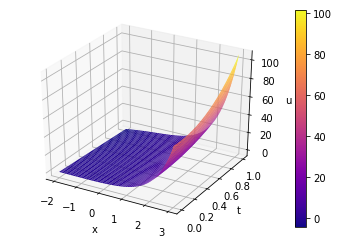

In [44]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # makes 3D plot possible
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d') # convert plot to 3D

surf = ax.plot_surface(X,T,U,
                       cmap=cm.plasma)

# set plot properties
title('Solution of wave equation')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u');
colorbar(surf);

##### Test for the Boundary conditions
Now we can test, if the boundary conditions are actually true. Lets start by testing the first and second boundary conditions!  
__First condition:__  
$u(0,x)\overset{!}{=}x*\exp(x)$

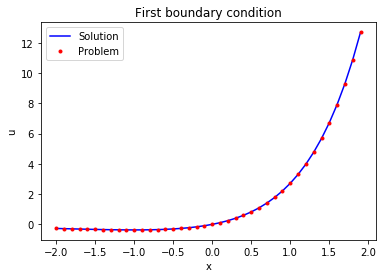

In [46]:
%matplotlib inline

x = arange(-2,2,0.1)
solution = u(0,x)
problem = x*exp(x)

fig = plt.figure()
plot(x,solution,'b', 
     x,problem,'.r');

title('First boundary condition')
legend(['Solution', 'Problem'])
xlabel('x')
ylabel('u');

__Second condition:__  
$u_t(0,x)\overset{!}{=}-x^2$

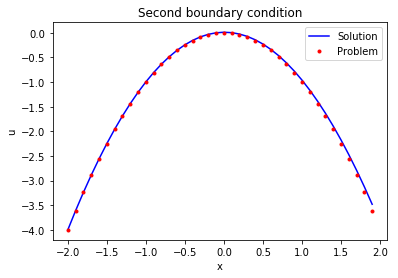

In [45]:
h = 1/100
x = arange(-2,2,0.1)
solution = (u(h,x)-u(0,x))/h
problem = -x**2

fig = plt.figure()
plot(x,solution,'b', 
     x, problem,'.r')

title('Second boundary condition')
legend(['Solution', 'Problem'])
xlabel('x')
ylabel('u');

#### And finally, lets test for the wave equation properties!

We know that $u_{tt} - u_{xx} = 0$ in theory. To test this with our solution, we need to calculate the second partial derivatives with respect to t and x on our discretization.  
To do this, we approximate the derivatives with the following formulas:  
\begin{equation}
\frac{\partial^2 u}{\partial t^2} \approx \frac{u(t_{(i)}{+}h_t,x_{(i)}) - 2u(t_{(i)},x_{(i)}) + u(t_{(i)}{-}h_t,x_{(i)})}{(h_t)^2} \small{\text{ for } i \in \{1, \dots, n_t{-}1\}} \\
\frac{\partial^2 u}{\partial x^2} \approx \frac{u(t_{(j)},x_{(j)}{+}h_x) - 2u(t_{(j)},x_{(j)}) + u(t_{(j)},x_{(j)}{-}h_x)}{(h_x)^2} \small{\text{ for } j \in \{1, \dots, n_x{-}1\}}
\end{equation}  

Notice how we don't can't use this formula for $i=0$ and $i=n_t$, as well as $j=0$ and $j=n_x$. This is because at the edge of our grid, we can't use $u(t_0-h_t,x)$ etc, since it's not in our grid anymore.  
For this reason, we just disregard it and use the derivative from the grid point next to it.

So let's get concrete!  
First, lets create the discretization matrices for $u_{tt}$ and $u_{xx}$ like this:

\begin{equation*}
D^2_{t} U^{(t)} = U_{tt}
\end{equation*}
using this discretization matrix:
  
\begin{equation*}
D^2_{t} =
\begin{bmatrix}
  \begin{bmatrix}
    1 & -2 & 1 \\
    1 & -2 & 1 \\
    & 1 & -2 & 1 \\
    &&& \ddots \\
    &&& 1 & -2 & 1 \\
    &&&& 1 & -2 & 1 \\
    &&&& 1 & -2 & 1 \\
  \end{bmatrix}
  && 0 \\
  & \ddots & \\
  0 &&
  \begin{bmatrix}
    1 & -2 & 1 \\
    1 & -2 & 1 \\
    & 1 & -2 & 1 \\
    &&& \ddots \\
    &&& 1 & -2 & 1 \\
    &&&& 1 & -2 & 1 \\
    &&&& 1 & -2 & 1 \\
  \end{bmatrix} \\
\end{bmatrix}
\text{ with }
U^{(t)} =
\begin{bmatrix}
    \begin{bmatrix}
    \vdots \\
    x=x_{min} \\
    \vdots
    \end{bmatrix} \\
    \begin{bmatrix}
    \vdots \\
    x=h_x \\
    \vdots
    \end{bmatrix}\\
    \begin{bmatrix}
    \vdots \\
    x=2h_x \\
    \vdots
    \end{bmatrix} \\
    \vdots \\
    \begin{bmatrix}
    \vdots \\
    x=x_{max} \\
    \vdots
    \end{bmatrix} \\    
\end{bmatrix}
\end{equation*}

This means reshaping $U$ to a vector appropriate fot the discretization matrix. Basically, we just stack all the columns of $U$ (where x is constant) on top of each other. We use this to approximate the second partial derivative in t: $\frac{\partial^2 u}{\partial t^2}$  
Finally, we simply reshape this vector back to the matrix form with shape $(n_t)\times(n_x)$!  
Notice, how the first and last row of each submatrix in $D^2_t$ is the same as the row below/above it. This is because we can't easily aproximate the second derivative at the edges of our discretization grid, as mentioned above.

Now, for $U^{(x)}$ and $D^2_{x}$ we do the same thing, just changing the dimensions of the submatrix and the reshaped vector accordingly.

---

So lets create $D^2_t$ and $D^2_x$ by just adding three diagonal matrices!

In [132]:
h_t = (t_max-t_min)/n_t
D2_t = diag(-2*ones(size(U))/h**2) + diag(ones(size(U)-1)/h**2,1) + diag(ones(size(U)-1)/h**2,-1)
for row in arange(0,n_x*n_t,n_t):
    D2_t[row] = D2_t[row+1]
    D2_t[row+n_t-1] = D2_t[row+n_t-2]

In [131]:
h_x = (x_max-x_min)/n_x
D2_x = diag(-2*ones(size(U))/h**2) + diag(ones(size(U)-1)/h**2,1) + diag(ones(size(U)-1)/h**2,-1)
for row in arange(0,n_x*n_t,n_x):
    D2_x[row] = D2_x[row+1]
    D2_x[row+n_x-1] = D2_x[row+n_x-2]

Now we just need to reshape $U$ to get $U^{(t)}$ and $U^{(x)}$ and then multiply it with the matrices:
\begin{equation}
U_{tt} = D^2_t U^{(t)} \\
U_{xx} = D^2_x U^{(x)}
\end{equation}

In [133]:
U_t_vec = reshape(U.T,(size(U),1))
U_x_vec = reshape(U,(size(U),1))

U_tt = reshape(dot(D2_t,U_t_vec), (n_x,n_t)).T
U_xx = reshape(dot(D2_x,U_x_vec), (n_t,n_x))

Finally we simply plot the error $u_{tt} - u_{xx}$ and hope to see a plane zero everywhere.

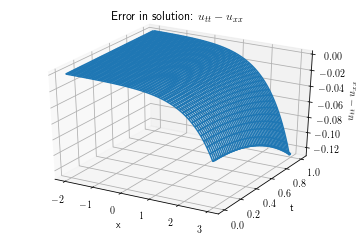

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_wireframe(X,T,(U_tt-U_xx))

plt.rc('text', usetex=True)
title("Error in solution: $u_{tt} - u_{xx}$")
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('$u_{tt}-u_{xx}$');

As we can see, it is not perfect, but definitely acceptable recalling the somewhat low resolution.

__So this is it!__  
To recap what we did:

- First, we tried to solve the problem theoretically, using the _d'Alembert_ solution
- Then, we tried to verify the solution numerically with the following steps
- We discretized an arbitrary grid around zero
- We evaluated the solution on that grid
- We tested the boundary conditions in $t{=}0$
- Finally, we approximated the second partial derivatives and checked for the wave equation properties
